In [5]:
 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.getcwd() + '/..')

from adaptation_lib.spike_stats import *

test_config={}
test_config['nvn']=1
test_config['pcn']=0
test_config['pvn']=100
test_config['sstn']=0
test_config['in_freq']=350
in_freq=100
nvn=1
pvn=100
pcn=0
sstn=0
test_config['duration']=1

board_names=["dev_board"]
date_label ="2022-11-23"
tname = "PC Neuron"
time_label = "11-17"
dir_path = f"./data/{tname}/{date_label}"
config_path = f"{dir_path}/config"
network_output=np.load(f"{dir_path}/pv_{time_label}.npy" )



FileNotFoundError: [Errno 2] No such file or directory: './data/PV Neuron/2022-11-23/pv_11-17.npy'

In [11]:
neurons=10
events=50
input_duration=1
id_list=[i for i in range(neurons)]*events
times_stamps=list(np.linspace(0, input_duration, events))
times_stamps=[i for i in times_stamps for j in range(neurons)]
print(times_stamps)
print(id_list)
print(len(times_stamps))
print(len(id_list))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.02040816326530612, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.04081632653061224, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.061224489795918366, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.08163265306122448, 0.1020408163265306, 0.1020408163265306, 0.1020408163265306, 0.1020408163265306, 0.1020408163265306,

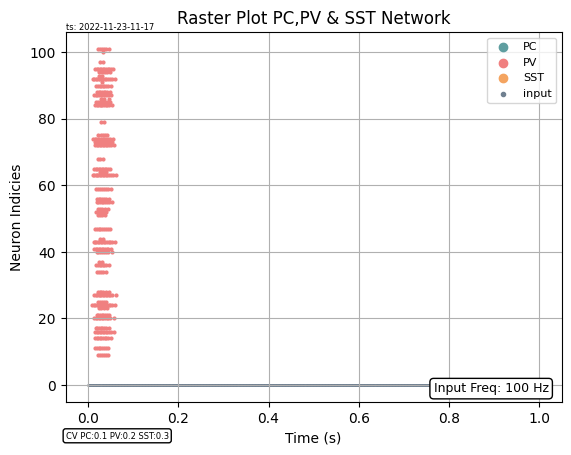

In [2]:

# Generate data...
from ctypes import c_void_p
network_output=np.asanyarray(network_output)
times=network_output[1]-network_output[1][0]
spike_id=np.asanyarray(network_output[0],dtype=np.uint8)


if pcn>0:
    pc_id=spike_id[(spike_id>nvn+1)&(spike_id<nvn+1+pcn)]
    pc_times=times[(spike_id>nvn+1)&(spike_id<nvn+1+pcn)]
else:
    pc_id=[]
    pc_times=[]

if pvn>0:
    pv_id=spike_id[(spike_id>nvn+1+pcn)&(spike_id<nvn+2+pcn+pvn)]
    pv_times=times[(spike_id>nvn+1+pcn)&(spike_id<nvn+2+pcn+pvn)]
else:
    pv_id=[]
    pv_times=[]

if sstn>0:
    sst_id=spike_id[(spike_id>nvn+2+pcn+pvn)&(spike_id<nvn+3+pcn+pvn+sstn)]
    sst_times=times[(spike_id>nvn+2+pcn+pvn)&(spike_id<nvn+3+pcn+pvn+sstn)]
else:
    sst_id=[]
    sst_times=[]

input_id=spike_id[spike_id==0]
input_time=times[spike_id==0]

cv_values=[.1,.2,.3]
plt.figure()
plt.scatter(pc_times,pc_id,c='cadetblue',s=4,label='PC')
plt.scatter(pv_times,pv_id,c='lightcoral',s=4,label='PV')
plt.scatter(sst_times,sst_id,c='sandybrown',s=4,label='SST')
plt.scatter(input_time,input_id,c='slategray',s=1,label='input')
plt.figtext(0.7, 0.13,'Input Freq: '+str(in_freq)+' Hz', size=9,bbox=dict(boxstyle="round", fc="w"))
plt.xlabel('Time (s)')
plt.ylabel('Neuron Indicies')
plt.grid()
plt.title('Raster Plot PC,PV & SST Network',fontsize=12)
annotation_string = f"ts: {date_label}-{time_label}"
plt.text(0,1.025, annotation_string,transform=plt.gca().transAxes, va = "top", ha="left",fontsize=6)
annotation_string = f"CV PC:{cv_values[0]} PV:{cv_values[1]} SST:{cv_values[2]}"
plt.text(0,-.08, annotation_string,transform=plt.gca().transAxes, va = "top", ha="left",fontsize=6,bbox=dict(boxstyle="round", fc="w"))
# Plot legend.
lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=8,markerscale=3)

plt.show()
plt.close()

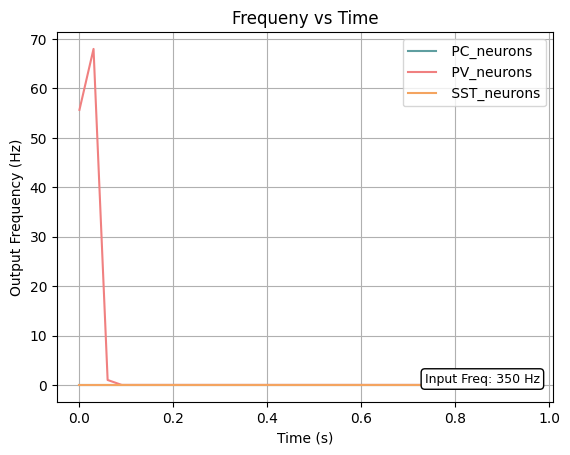

TypeError: fot_decay() takes 1 positional argument but 2 were given

In [3]:
fot_output=frequency_over_time(test_config,network_output)
graph_frequency_over_time(fot_output,test_config,save=False,show=True)
fot_decay(test_config,fot_output)

In [4]:
time_axis=fot_output[0]
print(times)
print(fot_output[2])
f_ss=fot_output[2][0]*.4
print(f_ss)
time_axis[fot_output[2]<f_ss][0]

[0.       0.001669 0.003338 ... 0.996661 0.99833  1.      ]
[55.66666667 68.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
22.266666666666666


0.06

[[array([  3,  11,   5,  33,   4,   2,   0,  93,   7,  10,   1,  23,  65,
           1,  79,  31,  70,   8,  90,  69,   0,  12, 100,   4,   0,  86,
           1,   6,  43,   1,   2,   1,   5,  55,  80,   8,  38,  69,  67,
           8,  31,  72,  68,  42,   2,  41,   7,  59,  91,  66,  67,  63,
          67,   7,  41,   5,   5,  53,  69,   3,  16,  77,  11,  42,   0,
          40,   4,   5,  45,  76,  86,  91,  22,  89,   9,   7,  36,   7,
          55,  71,  58,   0,  49,  48,  50,   6,  56,   8,  58,  59,  74,
          36,  80,  76,   3,  49,   4,   6,   9,  78,   3,  39,  81,   0,
          37,  38,   4,   2,   1,  48,  39,  47,  39,   9,  55,   7,  63,
          35,   9,  48,  28,   6,   6,  73,   5,  18,  53,   9,  72,   9,
         100,   4,   1,  78,   6,   2,   8,  58,  82,   4,  19,   0,   1,
          41,  61,  54,  77,  72,  45, 101,  75,   7,  32,   0,  72,  34,
          31,  31,  82,  49,   4,  73,   7,  62,   8,  64,  56,   7,  55,
           5,  59,   1,   0,   5,   8,

array([array([ 4.33333333,  9.66666667,  5.        , 14.        ,  4.        ,
               2.66666667,  1.66666667, 81.66666667,  7.        ,  9.33333333,
               2.        , 13.        , 51.        ,  1.33333333, 65.66666667,
              17.33333333, 48.33333333,  7.        , 77.33333333, 55.        ,
               1.        , 10.        , 89.33333333,  5.66666667,  2.33333333,
              73.        ,  3.        ,  5.33333333, 22.        ,  1.33333333,
               4.        ,  3.        ,  6.33333333, 25.33333333, 64.66666667,
               7.66666667, 20.33333333, 45.66666667, 53.66666667,  8.66666667,
              16.66666667, 57.66666667, 52.33333333, 20.33333333,  3.33333333,
              21.33333333,  6.33333333, 38.        , 76.66666667, 43.        ,
              45.        , 41.        , 52.33333333,  6.33333333, 20.66666667,
               4.66666667,  5.        , 33.        , 51.33333333,  2.33333333,
              10.        , 62.33333333,  9.33333333,

In [5]:
#utilizing windows, see which is the best step windows
steps=np.linspace(.01,.5,10)

for step in steps:
    duration=1
    windows_pc=split_spike_indices_by_window(pc_times, pc_id, step, duration)
    ff_windows_pc=(np.asarray(spikes_pc,dtype=float)/pcn/step)
    plt.plot(np.arange(0,duration,step),ff_windows_pc,label='%s data' % round(step,2))
    plt.legend()


NameError: name 'spikes_pc' is not defined

In [ ]:
#utilizing isi for individual neurons
pc_ff_list=[]
sst_ff_list=[]
pv_ff_list=[]

for i in range(nvn+1,pcn+1+nvn):  
    occurences=times[spike_id==i]
    if len(occurences)>0:
        isi=np.diff(occurences)
        if(isi==0).any():
            print("removed")
        else:
            pc_ff_list.append(1/isi)

    else:
        pc_ff_list.append(1/isi)

pc_ff_list=np.asanyarray(pc_ff_list,dtype=object)
# this can be used to obtain an overall frequency. 
pc_ff_list_ave=[np.mean(pc_ff_list[i]) for i in range(len(pc_ff_list))]
pc_average=np.mean(pc_ff_list_ave)

In [ ]:
#graph the individdual neurons
for i in range(pcn): 
    plt.plot(times[spike_id==nvn+1+i][0:-1],pc_ff_list[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Output Frequency (Hz)')
    plt.title(f'Frequency of individual neurons')
    plt.grid()

In [70]:
import numpy as np
x=[1,2,3]
y=[4,5,6]
z=[]
z.append(x)
z.append(y)
u=np.transpose(z)
print(u)
print(np.mean(u,axis=1))
type(x)

[[1 4]
 [2 5]
 [3 6]]
[2.5 3.5 4.5]


list

In [116]:
x=np.load('sweep_output.npy',allow_pickle=True)

pv=x[1]
len(pv)
print(pv.reshape((-1,1)))
np.mean(pv.reshape((-1,1)),axis=0)



[[array([  4,  40,   6,  39,   6,   3,   1,  97,   9,  28,   2,  36,  70,
           2,  85,  38,  77,  29,  94,  75,   1,  36, 104,   6,   2,  92,
           2,   8,  50,   2,   4,   3,   7,  62,  84,  10,  46,  76,  73,
          10,  39,  78,  73,  49,   3,  47,  22,  64,  97,  73,  73,  68,
          72,   9,  48,   8,   8,  59,  76,   4,  34,  82,  32,  49,   0,
          48,   5,   6,  51,  81,  90,  95,  35,  94,  32,  10,  43,  12,
          61,  78,  64,   1,  56,  54,  56,   7,  61,  22,  64,  64,  80,
          44,  85,  81,   4,  55,   6,  11,  33,  83,   4,  46,  86,   1,
          43,  46,   7,   3,   3,  54,  46,  53,  46,  34,  62,  29,  69,
          45,  26,  54,  36,  15,  15,  77,   8,  34,  58,  28,  79,  29,
         104,   6,   2,  84,   9,   3,  31,  64,  80,   6,  30,   1,   2,
          46,  67,  56,  83,  77,  52, 105,  82,  27,  39,   0,  77,  42,
          38,  38,  87,  55,   5,  79,  11,  67,  30,  70,  62,  28,  61,
           8,  66,   1,   0,   9,  28,

array([array([ 5.        , 19.66666667,  5.66666667, 16.66666667,  4.66666667,
               3.33333333,  2.        , 85.66666667,  7.66666667, 15.33333333,
               2.66666667, 18.        , 57.        ,  2.        , 72.33333333,
              20.33333333, 61.        , 14.33333333, 82.        , 61.        ,
               1.33333333, 18.33333333, 93.        ,  6.33333333,  3.        ,
              79.        ,  3.66666667,  6.66666667, 25.        ,  2.        ,
               4.66666667,  4.        ,  7.33333333, 36.33333333, 69.66666667,
               8.66666667, 23.33333333, 59.        , 60.33333333,  9.33333333,
              19.66666667, 64.        , 59.        , 24.        ,  4.        ,
              29.        , 12.        , 42.66666667, 83.        , 57.33333333,
              58.33333333, 53.        , 58.        ,  7.        , 24.        ,
               6.        ,  6.        , 38.33333333, 60.33333333,  3.        ,
              16.33333333, 68.33333333, 16.66666667,

In [90]:

print(pv[:,0])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [83]:
for i in range(1,4):
    print(i)

1
2
3


In [120]:

a=[[0, 0.12, 0], [0, 0.12, 0], [0, 0.12, 0]]
a=np.array(a)
if any(a[:,1])>1:
    print(0)

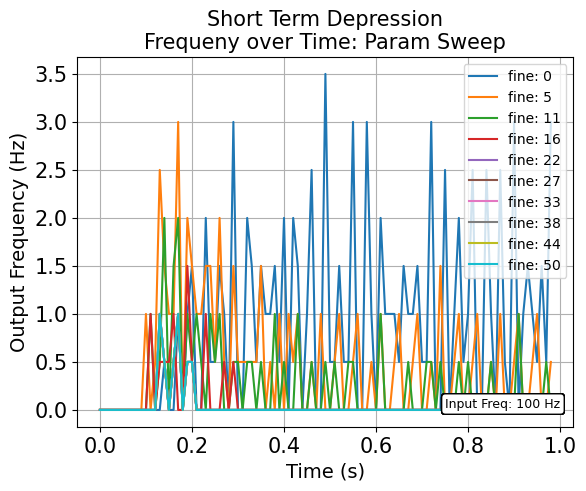

In [193]:
import matplotlib.pyplot as plt
plt.style.use('default')
SMALL_SIZE = 15
MEDIUM_SIZE = 14
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE-5)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
y=np.load('meh.npy')
x=np.load('moh.npy')
x=np.asanyarray(x,dtype='int')
plt.figure()
for i in range(10):
    fot_output=y[i]
    annotation_string='fine: '+str(x[i])
    plt.plot(fot_output[0],fot_output[2],label=annotation_string)
    plt.xlabel('Time (s)')
    plt.ylabel('Output Frequency (Hz)')
    plt.title('Short Term Depression\nFrequeny over Time: Param Sweep')
    plt.figtext(0.7, 0.15,'Input Freq: '+str(100)+' Hz', size=9,bbox=dict(boxstyle="round", fc="w"))
    plt.grid(True)
    plt.legend()
    


